In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import files

# Upload the Excel file
uploaded = files.upload()


Saving Chaldal1.csv to Chaldal1 (1).csv


In [ ]:
df = pd.read_csv('Chaldal1.csv')

# Display the first few rows of the dataset
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,userEngagement,Usability,translatedContent,processedContent
0,0,Saiful Islam,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,7.0.4,########,NaN,NaN,7.0.4,0,Positive,good,good
1,1,Engineer Rafiqul Islam,https://play-lh.googleusercontent.com/a-/ALV-U...,Great delivery service.,5,0,7.0.4,########,NaN,NaN,7.0.4,0,Positive,Great delivery service.,Great delivery service.
2,2,S.H.M. Altafur Rahman,https://play-lh.googleusercontent.com/a-/ALV-U...,Good delivery service.,5,0,7.0.4,########,NaN,NaN,7.0.4,0,Positive,Good delivery service.,Good delivery service.
3,3,Safayate Hasan Sakib,https://play-lh.googleusercontent.com/a/ACg8oc...,well received,5,0,7.0.4,########,NaN,NaN,7.0.4,0,Positive,well received,well received
4,4,Sagor Sorkar,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice,5,0,7.0.4,########,NaN,NaN,7.0.4,0,Positive,Nice,Nice


In [ ]:
columns_to_drop = ['userName','userImage', 'thumbsUpCount', 'reviewCreatedVersion','at','repliedAt','appVersion','translatedContent','content']
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
df.head()

,reviewId,score,replyContent,userEngagement,Usability,processedContent
0,0,5,NaN,0,Positive,good
1,1,5,NaN,0,Positive,Great delivery service.
2,2,5,NaN,0,Positive,Good delivery service.
3,3,5,NaN,0,Positive,well received
4,4,5,NaN,0,Positive,Nice


In [ ]:
df['replyContent'].fillna('', inplace=True)  # Replace NaN with an empty string
df.head()

,reviewId,score,replyContent,userEngagement,Usability,processedContent
0,0,5,,0,Positive,good
1,1,5,,0,Positive,Great delivery service.
2,2,5,,0,Positive,Good delivery service.
3,3,5,,0,Positive,well received
4,4,5,,0,Positive,Nice


In [ ]:
ax = df["score"].value_counts().sort_index()

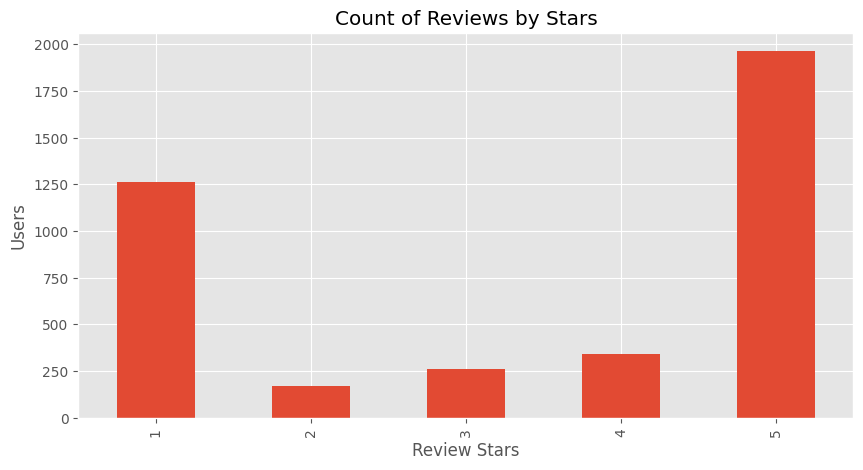

In [ ]:
ax = df["score"].value_counts().sort_index().plot(kind="bar", title="Count of Reviews by Stars", figsize=(10,5))

ax.set_xlabel('Review Stars')
ax.set_ylabel('Users')
plt.savefig('stars.pdf')
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['processedContent'])
    myid = i
    pipeline_result = sent_pipeline(text)
    res[myid] = pipeline_result[0].copy()

results_df2 = pd.DataFrame(res).T.reset_index().rename(columns={"index": "reviewId"})

# Convert 'reviewId' column to string in both DataFrames
results_df2['reviewId'] = results_df2['reviewId'].astype(str)
df['reviewId'] = df['reviewId'].astype(str)

# Merge the sentiment analysis results with the original DataFrame


100%|██████████| 3996/3996 [04:34<00:00, 14.55it/s]


In [ ]:
print("Results DataFrame:")
print(results_df2.head())

print("\nOriginal DataFrame:")
print(df.head())

# Merge the sentiment analysis results with the original DataFrame
merged_df = pd.merge(results_df2, df, on="reviewId", how="left")

print("\nMerged DataFrame:")
print(merged_df.head())


Results DataFrame:
  reviewId     label     score
0        0  POSITIVE  0.999816
1        1  POSITIVE  0.999834
2        2  POSITIVE   0.99985
3        3  POSITIVE  0.999866
4        4  POSITIVE  0.999855

Original DataFrame:
  reviewId  score replyContent  userEngagement Usability  \
0        0      5                            0  Positive   
1        1      5                            0  Positive   
2        2      5                            0  Positive   
3        3      5                            0  Positive   
4        4      5                            0  Positive   

          processedContent  
0                     good  
1  Great delivery service.  
2   Good delivery service.  
3            well received  
4                     Nice  

Merged DataFrame:
  reviewId     label   score_x  score_y replyContent  userEngagement  \
0        0  POSITIVE  0.999816        5                            0   
1        1  POSITIVE  0.999834        5                            0   
2   

In [ ]:
pos_reviews = merged_df[merged_df.label == 'POSITIVE']
neg_reviews = merged_df[merged_df.label == 'NEGATIVE']

print("Number of positive reviews:", pos_reviews.shape[0])
print("Number of negative reviews:", neg_reviews.shape[0])

neg_reviews = neg_reviews[neg_reviews.score_y < 4]
pos_reviews = pos_reviews[pos_reviews.score_y > 3]

print("Number of filtered positive reviews:", pos_reviews.shape[0])
print("Number of filtered negative reviews:", neg_reviews.shape[0])

distilbert_accuracy = (neg_reviews.shape[0] + pos_reviews.shape[0]) / results_df2.shape[0]
print("Accuracy:", distilbert_accuracy)


Number of positive reviews: 2230
Number of negative reviews: 1766
Number of filtered positive reviews: 2015
Number of filtered negative reviews: 1479
Accuracy: 0.8743743743743744


In [ ]:
neg_reviews = merged_df[merged_df.label == 'NEGATIVE']
pos_reviews = merged_df[merged_df.label == 'POSITIVE']

In [ ]:
print(pos_reviews)

     reviewId     label   score_x  score_y replyContent  userEngagement  \
0           0  POSITIVE  0.999816        5                            0   
1           1  POSITIVE  0.999834        5                            0   
2           2  POSITIVE   0.99985        5                            0   
3           3  POSITIVE  0.999866        5                            0   
4           4  POSITIVE  0.999855        5                            0   
...       ...       ...       ...      ...          ...             ...   
3990     3990  POSITIVE  0.999843        5                            0   
3991     3991  POSITIVE  0.997964        5                            0   
3992     3992  POSITIVE  0.999857        5                            0   
3993     3993  POSITIVE  0.999603        5                            0   
3995     3995  POSITIVE  0.872189        5                            0   

     Usability                                   processedContent  
0     Positive                 

In [ ]:
precision_pos_reviews = pos_reviews[pos_reviews.score_y <4]
print(precision_pos_reviews)

distilbert_precision = pos_reviews.shape[0]/(precision_pos_reviews.shape[0]+pos_reviews.shape[0])

     reviewId     label   score_x  score_y  \
6           6  POSITIVE  0.993953        1   
11         11  POSITIVE  0.999816        1   
30         30  POSITIVE  0.999857        3   
58         58  POSITIVE  0.999816        1   
87         87  POSITIVE  0.935678        3   
...       ...       ...       ...      ...   
3897     3897  POSITIVE  0.999858        3   
3911     3911  POSITIVE   0.79124        1   
3924     3924  POSITIVE  0.998483        1   
3960     3960  POSITIVE  0.978032        3   
3963     3963  POSITIVE  0.999855        1   

                                           replyContent  userEngagement  \
6                                                                     0   
11                                                                    0   
30    We appreciate the feedback! Please let us know...               1   
58    Thanks for the review. If you like our app, wo...               1   
87                                                                    0 

In [ ]:
recall_neg_reviews = neg_reviews[neg_reviews.score_y >3]
distilbert_recall = (neg_reviews.shape[0] + pos_reviews.shape[0])/(recall_neg_reviews.shape[0]+(neg_reviews.shape[0] + pos_reviews.shape[0]))

In [ ]:
distilbert_f1_Score = 2 * (distilbert_precision * distilbert_recall) / (distilbert_precision + distilbert_recall)

In [ ]:
print("DistilBERT accuracy: " + str(distilbert_accuracy))
print("DistilBERT Precision: " + str(distilbert_precision))
print("DistilBERT Recall: " + str(distilbert_recall))
print("DistilBERT F1 Score: " + str(distilbert_f1_Score))

DistilBERT accuracy: 0.8743743743743744
DistilBERT Precision: 0.9120654396728016
DistilBERT Recall: 0.9329908942330143
DistilBERT F1 Score: 0.9224095053596263


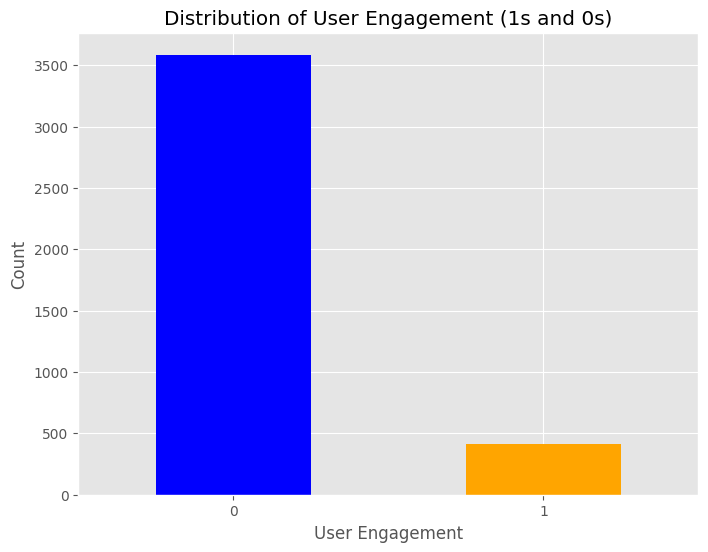

Average User Engagement: 0.10285285285285285


In [ ]:
import matplotlib.pyplot as plt
engagement_counts = merged_df['userEngagement'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
engagement_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of User Engagement (1s and 0s)')
plt.xlabel('User Engagement')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Calculate and print the average user engagement
average_engagement = merged_df['userEngagement'].mean()
print(f'Average User Engagement: {average_engagement}')

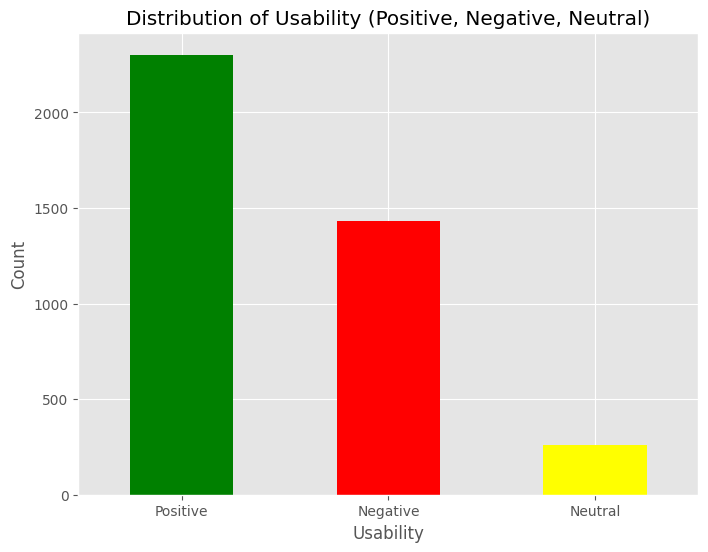

In [ ]:
usability_counts = merged_df['Usability'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
usability_counts.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Distribution of Usability (Positive, Negative, Neutral)')
plt.xlabel('Usability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()  # Instantiate the analyzer

In [ ]:
res = {}
vader_result_rename = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
  text = str(row['processedContent'])
  myid = i
  vader_result = sia.polarity_scores(text)
  for key,value in vader_result.items():
    vader_result_rename[f'vader_{key}'] = value
  roberta_result = polarity_scores_roberta(text)
  both = {**vader_result_rename, **roberta_result}
  res[myid] = both

100%|██████████| 3996/3996 [08:52<00:00,  7.50it/s]


In [ ]:
results_df = pd.DataFrame(res).T.reset_index().rename(columns={"index": "reviewId"})

# Convert 'reviewId' column to string in both DataFrames
results_df['reviewId'] = results_df['reviewId'].astype(str)
df['reviewId'] = df['reviewId'].astype(str)

In [ ]:
print("Results DataFrame:")
print(results_df.head())

print("\nOriginal DataFrame:")
print(df.head())

# Merge the sentiment analysis results with the original DataFrame
merged_df2 = pd.merge(results_df, df, on="reviewId", how="left")

print("\nMerged DataFrame:")
print(merged_df2.head())

Results DataFrame:
  reviewId  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0        0        0.0      0.000      1.000          0.4404     0.057428   
1        1        0.0      0.328      0.672          0.6249     0.007331   
2        2        0.0      0.408      0.592          0.4404     0.010256   
3        3        0.0      0.323      0.677          0.2732     0.015468   
4        4        0.0      0.000      1.000          0.4215     0.066038   

   roberta_neu  roberta_pos  
0     0.279547     0.663025  
1     0.063732     0.928936  
2     0.111676     0.878067  
3     0.282629     0.701903  
4     0.354453     0.579509  

Original DataFrame:
  reviewId  score replyContent  userEngagement Usability  \
0        0      5                            0  Positive   
1        1      5                            0  Positive   
2        2      5                            0  Positive   
3        3      5                            0  Positive   
4        4      5      

In [ ]:
tp = 0
for i, row in merged_df2.iterrows():
  positive = row["roberta_pos"]
  negative = row["roberta_neg"]
  neutral = row["roberta_neu"]
  if(max(positive, negative, neutral) == positive and (row["score"] == 4 or row["score"] == 5)):
    tp += 1
  elif(max(positive, negative, neutral) == neutral and row["score"] == 3):
    tp += 1
  elif(max(positive, negative, neutral) == negative and (row["score"] == 1 or row["score"] == 2)):
    tp += 1

roberta_accuracy = (tp) / (merged_df2.shape[0])

In [ ]:
tp = 0
fp = 0
for i,row in merged_df2.iterrows():
  positive = row["roberta_pos"]
  negative = row["roberta_neg"]
  neutral = row["roberta_neu"]
  if(max(positive,negative,neutral) == positive and row["score"]==4 or row["score"]==5):
    tp+=1
  elif(max(positive,negative,neutral) == neutral and row["score"]==3):
    tp+=1
  elif(max(positive,negative,neutral) == negative and row["score"]==1 or row["score"]==2):
    tp+=1
  elif(max(positive,negative,neutral) == positive and row["score"]<4):
    fp+=1
roberta_precision = (tp)/(tp+fp)

In [ ]:
tp = 0
fn = 0
for i,row in merged_df2.iterrows():
  positive = row["roberta_pos"]
  negative = row["roberta_neg"]
  neutral = row["roberta_neu"]
  if(max(positive,negative,neutral) == positive and row["score"]==4 or row["score"]==5):
    tp+=1
  elif(max(positive,negative,neutral) == neutral and row["score"]==3):
    tp+=1
  elif(max(positive,negative,neutral) == negative and row["score"]==1 or row["score"]==2):
    tp+=1
  if(max(positive,negative,neutral) == negative and row["score"]>2):
    fn+=1
  if(max(positive,negative,neutral) == negative and row["score"]!=3):
    fn+=1

roberta_recall = (tp)/(tp+fn)

In [ ]:
roberta_f1_Score = 2 * (roberta_precision * roberta_recall) / (roberta_precision + roberta_recall)

In [ ]:
print("Roberta accuracy: " + str(roberta_accuracy))
print("Roberta Precision: " + str(roberta_precision))
print("Roberta Recall: " + str(roberta_recall))
print("Roberta F1 Score: " + str(roberta_f1_Score))

Roberta accuracy: 0.7547547547547547
Roberta Precision: 0.9711211778029445
Roberta Recall: 0.7153284671532847
Roberta F1 Score: 0.8238261078419599
